# MARCOnI

Original website: http://marconi.mpi-inf.mpg.de 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'../')
from pak import utils
from pak.datasets.MARCOnI import MARCOnI
import matplotlib.pyplot as plt

root = '/home/julian/Data/pak_test1'

marconi = MARCOnI(root)

X, CNN = marconi['Soccer']

(MARCOnl)
	Soccer finished
	Kickbox finished
	SBoard finished
	Soccer2 finished
	Walk1 finished
	Walk2 finished
	Volleyball finished
	Juggling finished
	Run2 finished


(5, 510, 360, 640, 14)


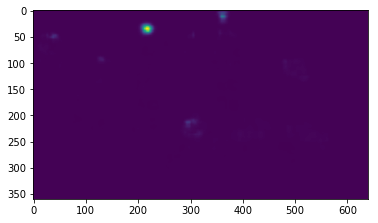

In [4]:
print(CNN.shape)

a = CNN[0,0,:,:,0]

plt.imshow(a)